# Modelling

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from pycm import *
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from boruta import BorutaPy

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold

from imblearn.metrics import geometric_mean_score

## Splitting into test and train

In [2]:
df = pd.read_excel('max_min_scaled.xlsx', index_col=0)
display(df)
y = df['Good Sleep?']

x = df[df.columns[~df.columns.isin(['Good Sleep?', 'Moon Position', 'Start Date'])]]
x = x.astype(np.float32)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42, test_size=0.2)

,Start Date,Regularity,Previous Night Sleep Quality Score,Good Sleep?,Steps,visibility_distance_max,air_temperature_max,humidity_mean,Moon Position,Daylight Hours,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,2019-12-24,0.350,86.204221,1,0.048945,0.846141,0.363395,0.742045,0.910822,0.000694,0,1,0,0,0,0,0
1,2019-12-25,0.575,86.000000,1,0.054093,0.923063,0.294430,0.740565,0.944890,0.001324,0,0,1,0,0,0,0
2,2019-12-26,0.675,88.000000,1,0.006940,0.692297,0.344828,0.857481,0.978958,0.002112,0,0,0,1,0,0,0
3,2019-12-27,0.775,90.000000,1,0.239901,0.323072,0.283820,0.875240,0.011022,0.003152,0,0,0,0,1,0,0
4,2019-12-28,0.700,92.000000,0,0.114435,0.276919,0.310345,0.839130,0.045090,0.004382,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2022-03-26,0.775,86.204221,1,0.523324,0.461531,0.525199,0.300725,0.780561,0.539926,0,0,0,0,0,1,0
713,2022-04-01,0.800,86.204221,1,0.165908,0.769219,0.286472,0.389818,0.983968,0.584818,0,0,0,0,1,0,0
714,2022-04-02,0.775,87.000000,1,0.264075,0.769219,0.310345,0.539903,0.016032,0.592289,0,0,0,0,0,1,0
715,2022-04-03,0.700,89.000000,0,0.387150,0.692297,0.336870,0.381530,0.049098,0.599729,0,0,0,0,0,0,1


## SMOTE

In [3]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)

sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

counter = Counter(y_train)
print(counter)

Counter({1: 402, 0: 171})
Counter({1: 402, 0: 402})


## Feature Importance Graph

### #1

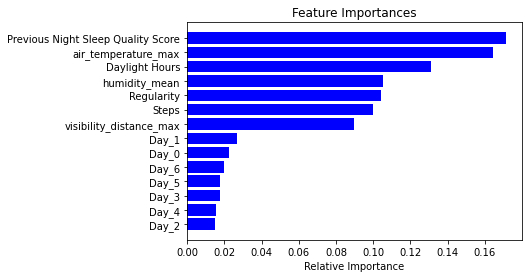

[0.53488372 0.8019802 ]
0.7222222222222222


0.6684319594750173

In [4]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10).fit(x_train,y_train)
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [x_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

y_pred=RF.predict(x_test)
print(metrics.f1_score(y_test, y_pred, average=None))
print(metrics.f1_score(y_test, y_pred, average='weighted'))
metrics.roc_auc_score(y_test, y_pred, average='weighted')

### #2

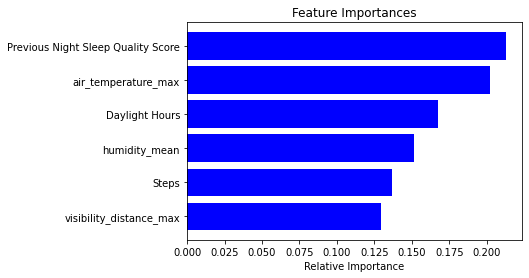

[0.54166667 0.77083333]
0.7024016203703703


0.6686622150587151

In [5]:
y = df['Good Sleep?']

x = df[df.columns[~df.columns.isin(['Good Sleep?', 'Moon Position', 'Start Date', 'Regularity','Day_0',  'Day_1','Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6'])]]
#x = df[df.columns[~df.columns.isin(['Good Sleep?', 'Moon Position', 'Start Date', 'Regularity'])]]
x = x.astype(np.float32)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42, test_size=0.2)
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

RF = RandomForestClassifier(n_estimators=1000, max_depth=10).fit(x_train,y_train)
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [x_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

y_pred=RF.predict(x_test)
print(metrics.f1_score(y_test, y_pred, average=None))
print(metrics.f1_score(y_test, y_pred, average='weighted'))
metrics.roc_auc_score(y_test, y_pred, average='weighted')

## Running All Models

In [6]:
y = df['Good Sleep?']

x = df[df.columns[~df.columns.isin(['Good Sleep?', 'Moon Position', 'Start Date', 'Regularity'])]]
#x = df[['Previous Night Sleep Quality Score', 'air_temperature_max', 'humidity_mean', 'Daylight Hours', 'Steps', 'visibility_distance_max']]
x = x.astype(np.float32)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42, test_size = 0.2)
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [7]:
LR = LogisticRegression(max_iter=350, solver='liblinear').fit(x_train, y_train)

LGBM = LGBMClassifier().fit(x_train,y_train)

XGB = XGBClassifier().fit(x_train, y_train)

SVM_ovo = svm.SVC(decision_function_shape="ovo").fit(x_train, y_train)

RF = RandomForestClassifier(n_estimators=1000, max_depth=10).fit(x_train, y_train)

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=42).fit(x_train, y_train)

CatBoost = CatBoostClassifier(verbose=0, n_estimators=100).fit(x_train,y_train)

gnb = GaussianNB().fit(x_train, y_train)

c:\users\ab78\poetry-envs\project-vtcwstaz-py3.8\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [8]:
models_dict = {
                'Logitstic regression':LR, 
                'SVM ono':SVM_ovo, 
                'Random Forest':RF, 
                'Neural Network':NN, 
                'XGB': XGB,
                'LGBM': LGBM,
                'CAT': CatBoost,
                'Gaussian': gnb,
              }

compare_df = pd.DataFrame()

for name, model in models_dict.items():
    y_pred=model.predict(x_test)
    print(name)
    print(metrics.f1_score(y_test, y_pred, average=None), metrics.f1_score(y_test, y_pred, average='weighted'))
    print()
    
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    model_dict = {
    'Name':name,
    'Score': model.score(x_test, y_test),
    "F1 score": round(metrics.f1_score(y_test, y_pred, average='weighted'), 4),
    "Precision": round(metrics.precision_score(y_test, y_pred), 3),
    "Recall": round(metrics.recall_score(y_test, y_pred), 6),
    "G-mean": round(geometric_mean_score(y_test, y_pred), 4),
    "AUC": round(metrics.roc_auc_score(y_test, y_pred, average='weighted'), 4),
    "MMC": round(metrics.matthews_corrcoef(y_test, y_pred),4),
    "True_N": round(tn),
    "True_P": round(tp),
    "False_N": round(fn),
    "False_P": round(fp)
    }

    compare_df = compare_df.append(model_dict, ignore_index=True)

compare_df = compare_df.sort_values('AUC', ascending=False).reset_index(drop=True)
compare_df

Logitstic regression
[0.59793814 0.79581152] 0.7367243302567423



C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\2845013420.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_df = compare_df.append(model_dict, ignore_index=True)
C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\2845013420.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_df = compare_df.append(model_dict, ignore_index=True)


SVM ono
[0.51785714 0.69318182] 0.6408279220779219

Random Forest
[0.56179775 0.8040201 ] 0.7316898161218076



C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\2845013420.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_df = compare_df.append(model_dict, ignore_index=True)
C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\2845013420.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_df = compare_df.append(model_dict, ignore_index=True)
C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\2845013420.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_df = compare_df.append(model_dict, ignore_index=True)
C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\2845013420.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compar

Neural Network
[0.6185567  0.80628272] 0.7502256466538326

XGB
[0.47619048 0.78431373] 0.6923046996576409

LGBM
[0.49438202 0.77386935] 0.6904113262943933

CAT
[0.57777778 0.80808081] 0.7393097643097644

Gaussian
[0.57142857 0.77894737] 0.7169799498746867



C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\2845013420.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_df = compare_df.append(model_dict, ignore_index=True)
C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\2845013420.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_df = compare_df.append(model_dict, ignore_index=True)


,Name,Score,F1 score,Precision,Recall,G-mean,AUC,MMC,True_N,True_P,False_N,False_P
0,Neural Network,0.743056,0.7502,0.856,0.762376,0.7293,0.7300,0.4349,30,77,24,13
1,Logitstic regression,0.729167,0.7367,0.844,0.752475,0.7124,0.7134,0.4035,29,76,25,14
2,CAT,0.736111,0.7393,0.825,0.792079,0.6920,0.6984,0.3872,26,80,21,17
3,Gaussian,0.708333,0.7170,0.831,0.732673,0.6907,0.6919,0.3615,28,74,27,15
4,Random Forest,0.729167,0.7317,0.816,0.792079,0.6786,0.6867,0.3666,25,80,21,18
5,SVM ono,0.625000,0.6408,0.813,0.603960,0.6382,0.6392,0.2550,29,61,40,14
6,LGBM,0.687500,0.6904,0.786,0.762376,0.6245,0.6370,0.2689,22,77,24,21
7,XGB,0.694444,0.6923,0.777,0.792079,0.6070,0.6286,0.2608,20,80,21,23


## Cross Validation Compare Dataframe Create

In [58]:
compare_cross_val_df = pd.DataFrame()

## Cross Validation CAT

In [59]:
from sklearn.model_selection import StratifiedKFold

y = df['Good Sleep?']
X = df[['Previous Night Sleep Quality Score', 'air_temperature_max', 'humidity_mean', 'Daylight Hours', 'Steps']]
X = X.astype(np.float32)

k=5
skf  = StratifiedKFold(n_splits=k, shuffle=True)

precision_score=[]
f1_score = []
auc_roc_score = []
geo_mean_score = []
acc_score = []
mmc_score = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    CatBoost = CatBoostClassifier(verbose=0, n_estimators=100)
    
    CatBoost.fit(X_train_oversampled, y_train_oversampled)
    pred_values = CatBoost.predict(X_test)
    
    f1 = metrics.f1_score(y_test, pred_values, average=None)
    print(f1)
    f1 = metrics.f1_score(y_test, pred_values, average='weighted')
    f1_score.append(f1)
    
    auc_roc = metrics.roc_auc_score(y_test, pred_values, average='weighted')
    auc_roc_score.append(auc_roc)
    
    geo_mean = geometric_mean_score(y_test, pred_values, average='weighted')
    geo_mean_score.append(geo_mean)
    
    mmc = metrics.matthews_corrcoef(y_test, pred_values)
    mmc_score.append(mmc)
    

[0.44       0.70212766]
[0.51612903 0.76923077]
[0.58585859 0.78074866]
[0.59793814 0.79365079]
[0.56842105 0.78534031]


In [60]:
model_dict = {
    'Name':'CatBoost',
    "F1 score": sum(f1_score)/k,
    "G-mean": sum(geo_mean_score)/k,
    "AUC": sum(auc_roc_score)/k,
    "MCC": sum(mmc_score)/k
    }

compare_cross_val_df = compare_cross_val_df.append(model_dict, ignore_index=True)

C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\3337319066.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_cross_val_df = compare_cross_val_df.append(model_dict, ignore_index=True)


## Cross Validation Logistic Regression

In [61]:
k=5
skf  = StratifiedKFold(n_splits=k, shuffle=True)

precision_score=[]
f1_score = []
auc_roc_score = []
geo_mean_score = []
acc_score = []
mmc_score = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    LR = LogisticRegression(max_iter=350)
    
    LR.fit(X_train_oversampled, y_train_oversampled)
    pred_values = LR.predict(X_test)
    
    f1 = metrics.f1_score(y_test, pred_values, average=None)
    print(f1)
    f1 = metrics.f1_score(y_test, pred_values, average='weighted')
    f1_score.append(f1)
    
    auc_roc = metrics.roc_auc_score(y_test, pred_values, average='weighted')
    auc_roc_score.append(auc_roc)
    
    geo_mean = geometric_mean_score(y_test, pred_values, average='weighted')
    geo_mean_score.append(geo_mean)
    
    mmc = metrics.matthews_corrcoef(y_test, pred_values)
    mmc_score.append(mmc)

[0.52525253 0.75132275]
[0.62135922 0.78918919]
[0.51612903 0.76683938]
[0.62962963 0.7752809 ]
[0.3956044  0.71794872]


In [62]:
model_dict = {
    'Name':'Logistic Regression',
    "F1 score": sum(f1_score)/k,
    "G-mean": sum(geo_mean_score)/k,
    "AUC": sum(auc_roc_score)/k,
    "MCC": sum(mmc_score)/k
    }

compare_cross_val_df = compare_cross_val_df.append(model_dict, ignore_index=True)

C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\1987894197.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_cross_val_df = compare_cross_val_df.append(model_dict, ignore_index=True)


## Cross Validation Gaussian

In [63]:
k=5
skf  = StratifiedKFold(n_splits=k, shuffle=True)

precision_score=[]
f1_score = []
auc_roc_score = []
geo_mean_score = []
acc_score = []
mmc_score = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    gnb = GaussianNB()
    
    gnb.fit(X_train_oversampled, y_train_oversampled)
    pred_values = gnb.predict(X_test)
    
    f1 = metrics.f1_score(y_test, pred_values, average=None)
    print(f1)
    f1 = metrics.f1_score(y_test, pred_values, average='weighted')
    f1_score.append(f1)
     
    precision = metrics.precision_score(y_test, pred_values)
    precision_score.append(precision)
    
    auc_roc = metrics.roc_auc_score(y_test, pred_values, average='weighted')
    auc_roc_score.append(auc_roc)
    
    geo_mean = geometric_mean_score(y_test, pred_values, average='weighted')
    geo_mean_score.append(geo_mean)
    
    mmc = metrics.matthews_corrcoef(y_test, pred_values)
    mmc_score.append(mmc)

[0.46315789 0.7357513 ]
[0.50909091 0.69662921]
[0.59047619 0.76243094]
[0.56862745 0.76086957]
[0.52941176 0.73913043]


In [64]:
model_dict = {
    'Name':'Gaussian',
    "F1 score": sum(f1_score)/k,
    "G-mean": sum(geo_mean_score)/k,
    "AUC": sum(auc_roc_score)/k,
    "MCC": sum(mmc_score)/k
    }

compare_cross_val_df = compare_cross_val_df.append(model_dict, ignore_index=True)

C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\319522285.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_cross_val_df = compare_cross_val_df.append(model_dict, ignore_index=True)


## Cross Validation NN

In [65]:
k=5
skf = StratifiedKFold(n_splits=k, shuffle=True)

precision_score=[]
f1_score = []
auc_roc_score = []
geo_mean_score = []
acc_score = []
mmc_score = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    NN = MLPClassifier(solver='lbfgs', alpha=0.0001 ,max_iter=600, hidden_layer_sizes=(150,10))
    
    NN.fit(X_train_oversampled, y_train_oversampled)
    pred_values = NN.predict(X_test)
    
    f1 = metrics.f1_score(y_test, pred_values, average=None)
    print(f1)
    f1 = metrics.f1_score(y_test, pred_values, average='weighted')
    f1_score.append(f1)
    
    auc_roc = metrics.roc_auc_score(y_test, pred_values, average='weighted')
    auc_roc_score.append(auc_roc)
    
    geo_mean = geometric_mean_score(y_test, pred_values, average='weighted')
    geo_mean_score.append(geo_mean)
    
    acc = metrics.accuracy_score(y_test, pred_values)
    acc_score.append(acc)
    
    mmc = metrics.matthews_corrcoef(y_test, pred_values)
    mmc_score.append(mmc)

[0.55445545 0.75935829]
[0.58333333 0.79166667]
[0.45360825 0.71957672]
[0.59047619 0.76243094]
[0.50485437 0.72131148]


In [66]:
model_dict = {
    'Name':'MLP',
    "F1 score": sum(f1_score)/k,
    "G-mean": sum(geo_mean_score)/k,
    "AUC": sum(auc_roc_score)/k,
    "MCC": sum(mmc_score)/k
    }

compare_cross_val_df = compare_cross_val_df.append(model_dict, ignore_index=True)

C:\Users\ab78\AppData\Local\Temp\ipykernel_59468\1777837879.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare_cross_val_df = compare_cross_val_df.append(model_dict, ignore_index=True)


In [67]:
compare_cross_val_df = compare_cross_val_df.sort_values('AUC', ascending=False).reset_index(drop=True)
compare_cross_val_df

,Name,F1 score,G-mean,AUC,MCC
0,CatBoost,0.699185,0.667662,0.668138,0.317938
1,Logistic Regression,0.693719,0.666948,0.667798,0.313855
2,MLP,0.687207,0.662784,0.663043,0.304827
3,Gaussian,0.677207,0.658029,0.658321,0.293935
